<a href="https://colab.research.google.com/github/K-107/exercise/blob/main/bone_segmentation/label_generater.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import cv2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 기분 전환

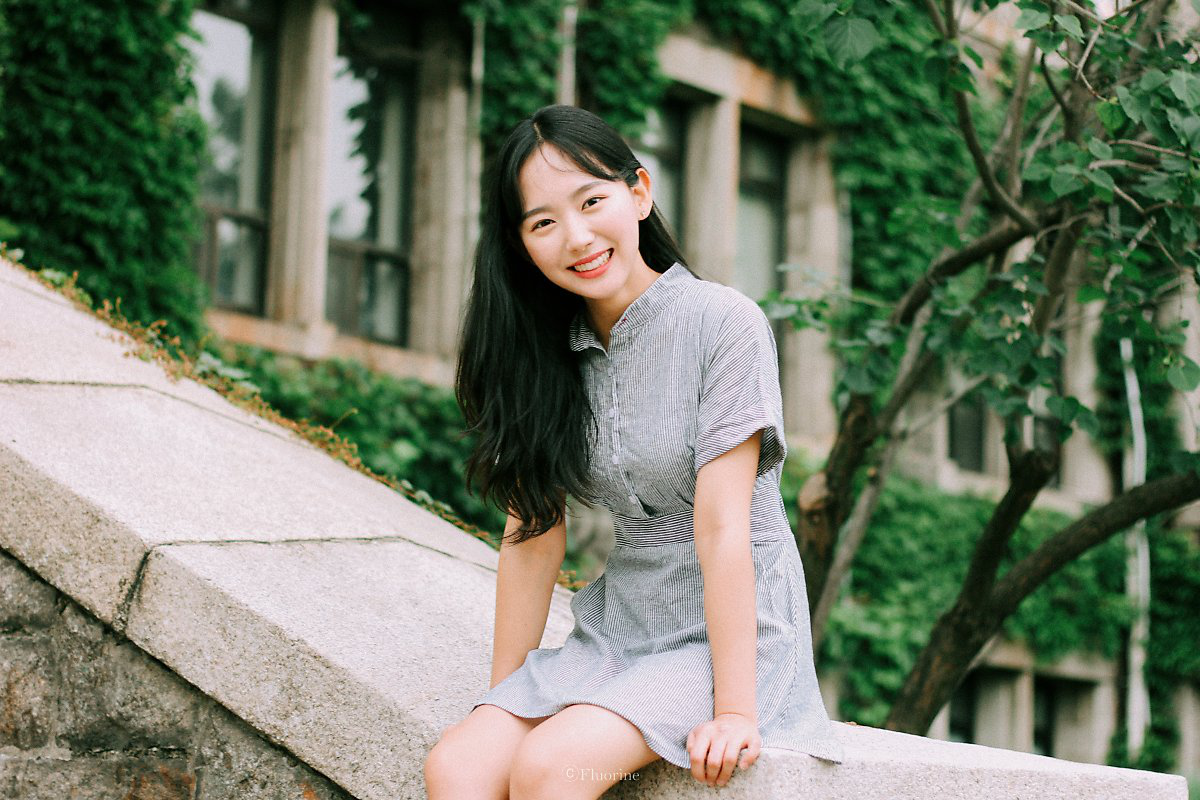

In [ ]:
girl = Image.open('/content/drive/MyDrive/IMG_3231.jpg')
girl

In [ ]:
girl = np.array(girl)
girl.shape

(800, 1200, 3)

In [ ]:
girl[:,:,0]

array([[ 49,  34,  24, ..., 130, 136, 143],
       [ 49,  41,  32, ..., 131, 131, 135],
       [ 44,  44,  35, ..., 128, 127, 128],
       ...,
       [158, 152, 140, ...,  90,  90,  92],
       [151, 132, 122, ...,  94,  90,  88],
       [117, 110, 101, ...,  95,  87,  81]], dtype=uint8)

## 여기서부터 시작!

### 참고

https://www.youtube.com/watch?v=sSxdQq9CCx0

https://www.youtube.com/watch?v=L5iV5BHkMzM&t=1318s

In [ ]:
!git clone https://github.com/hanyoseob/youtube-cnn-002-pytorch-unet.git

Cloning into 'youtube-cnn-002-pytorch-unet'...
remote: Enumerating objects: 65, done.
remote: Counting objects: 100% (65/65), done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 65 (delta 29), reused 52 (delta 16), pack-reused 0
Unpacking objects: 100% (65/65), done.


In [ ]:
%cd /content/youtube-cnn-002-pytorch-unet

/content/youtube-cnn-002-pytorch-unet


## 준비된 데이터 로드

In [ ]:
labels = os.listdir('/content/drive/MyDrive/bone/labels')

['8134.jpeg',
 '8158.jpeg',
 '8272.jpeg',
 '8239.jpeg',
 '8094.jpeg',
 '8269.jpeg',
 '7716.jpeg',
 '8088.jpeg',
 '7683.jpeg',
 '7937.jpeg',
 '7691.jpeg',
 '7518.jpeg',
 '8044.jpeg',
 '8016.jpeg',
 '7910.jpeg',
 '7936.jpeg',
 '7305.jpeg',
 '7236.jpeg',
 '7333.jpeg',
 '7483.jpeg']

In [ ]:
! rm -rf '/content/youtube-cnn-002-pytorch-unet/datasets/train'

In [ ]:
TRAIN_PATH = '/content/youtube-cnn-002-pytorch-unet/datasets/train'
Val_PATH = '/content/youtube-cnn-002-pytorch-unet/datasets/val'
TEST_PATH = '/content/youtube-cnn-002-pytorch-unet/datasets/test'

LABEL_PATH = '/content/drive/MyDrive/bone/labels'

labels = os.listdir(LABEL_PATH)
labels = sorted(labels)

rows = 4
cols = 4

for num, label in enumerate(labels):
  # print(label)
  image = cv2.imread(LABEL_PATH+'/'+f'{label}', cv2.IMREAD_GRAYSCALE)
  # print(image)
  im_np = np.asarray(image)
  # print(im_np.shape)
  if not os.path.exists(SAVE_PATH):
    os.makedirs(SAVE_PATH)
  if not os.path.exists(Val_PATH):
    os.makedirs(Val_PATH)
  if not os.path.exists(TEST_PATH):
    os.makedirs(TEST_PATH)

  np.save(TRAIN_PATH+'/'+'label_%03d.npy' % num, im_np)

In [ ]:
PATH = '/content/drive/MyDrive/bone/original'

bones = os.listdir(PATH)
bones = sorted(bones)

WIDTH = 800
HEIGHT = 800

rows = 4
cols = 4

bones_box = np.zeros((len(bones),WIDTH,HEIGHT))

for num, bone in enumerate(bones):

  image_pil = Image.open(PATH+'/'+f'{bone}')
  image = np.array(image_pil)

  grey_image = cv2.resize(image,(WIDTH,HEIGHT)).astype('float64')

  # print(grey_image.shape)

  grey_image = grey_image.reshape(WIDTH,HEIGHT)
  # print(grey_image.shape)

  bones_box[num] = grey_image

  im = Image.fromarray(grey_image)

  np.save(SAVE_PATH+'/'+'input_%03d.npy' % num, im)

In [ ]:
input1 = np.load('/content/youtube-cnn-002-pytorch-unet/datasets/train/input_001.npy')
input1.shape

(800, 800)

In [ ]:
label1 = np.load('/content/youtube-cnn-002-pytorch-unet/datasets/train/label_001.npy')
label1.shape

(800, 800)

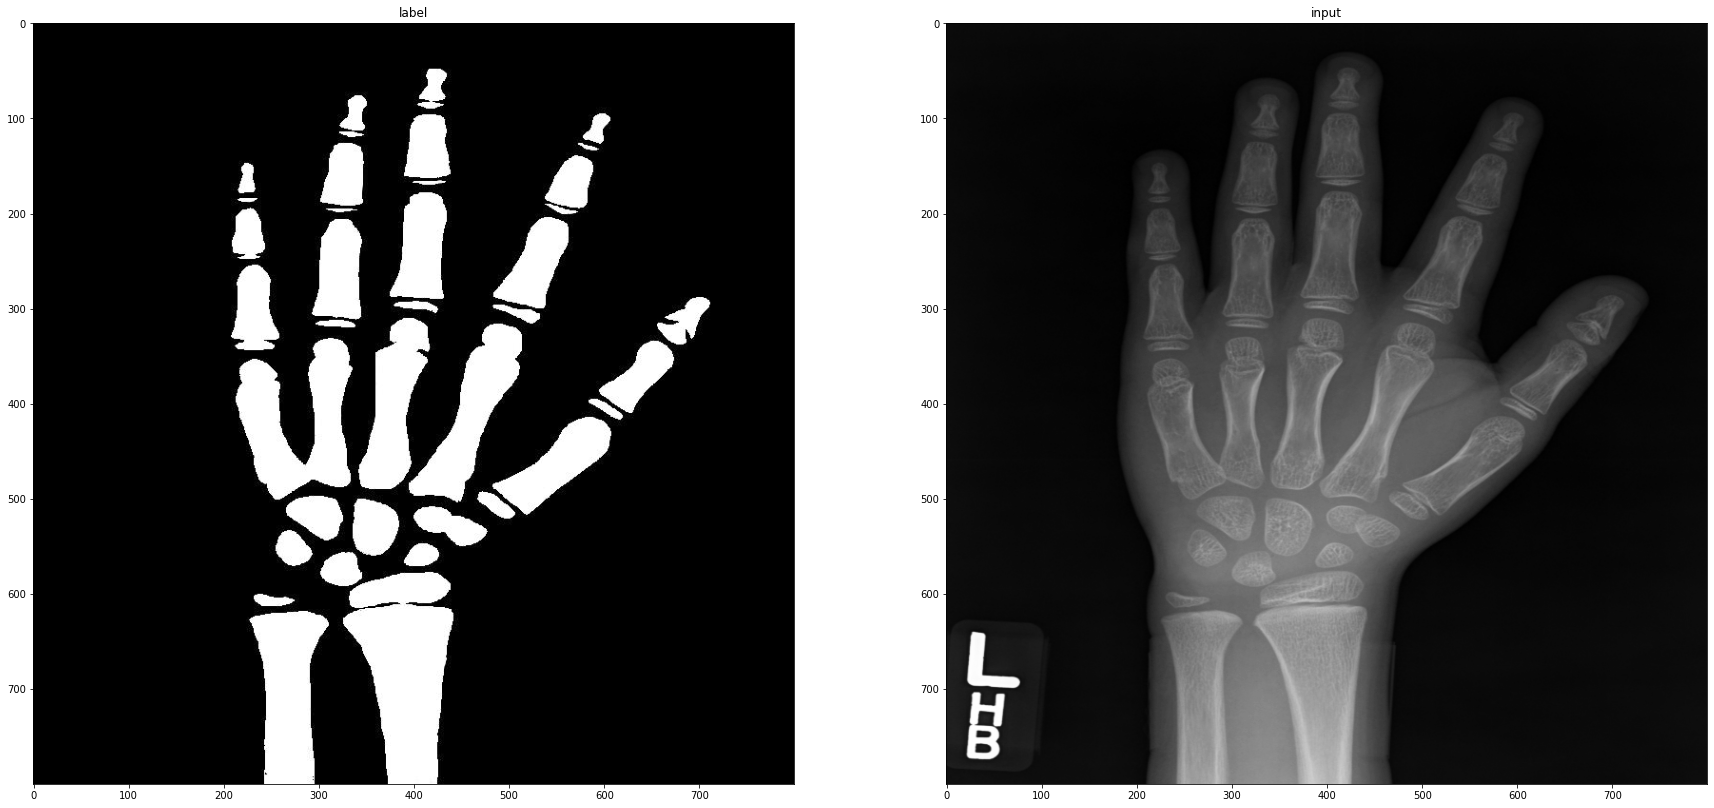

In [ ]:
plt.figure(figsize=(30,30))

plt.subplot(121)
plt.imshow(label1, cmap='gray')
plt.title('label')

plt.subplot(122)
plt.imshow(input1, cmap='gray')
plt.title('input')

plt.show()

## 모델 트레이닝

In [ ]:
# batch size = 2로 하자!
!python train.py

learning rate: 1.0000e-03
batch size: 2
number of epoch: 100
data dir: ./datasets
ckpt dir: ./checkpoint
log dir: ./log
result dir: ./result
mode: train
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to 

## INFEFENCE 데이터 로드

In [ ]:
PATH = '/content/drive/MyDrive/bone/test_label'
bones = os.listdir(PATH)

# WIDTH = 800
# HEIGHT = 800

bones_box = np.zeros((len(bones),WIDTH,HEIGHT))

for num, bone in enumerate(bones):

  image_pil = Image.open(PATH+'/'+f'{bone}')
  image = np.array(image_pil)

  resized_image = cv2.resize(image,(WIDTH,HEIGHT))

  grey_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)
  grey_image = grey_image.reshape(WIDTH,HEIGHT)

  bones_box[num] = grey_image

  print(f"{bone} size = ", grey_image.shape)

# bones_box = np.expand_dims(bones_box, axis=3)
print(bones_box.shape)

In [ ]:
rows = 4
cols = 4

for num, bone in enumerate(bones_box):
  # print(num)
  # print(bone[:,:,0].shape)
  num += 1
  plt.figure(figsize=(30,30))
  plt.subplot(rows, cols, num)
  plt.imshow(bone,cmap='gray')

In [ ]:
ground_truths = np.where(bones_box<255,'0.','255.').astype('float64')

rows = 4
cols = 4

for num, ground_truth in enumerate(ground_truths):
  # print(num)
  num += 1
  plt.figure(figsize=(30,30))
  plt.subplot(rows, cols, num)
  image = ground_truth
  plt.imshow(image, cmap='gray')
  im = np.asarray(image)
  # im = Image.fromarray(image)

  if not os.path.exists(SAVE_PATH):
    os.makedirs(SAVE_PATH)
  if not os.path.exists(Val_PATH):
    os.makedirs(Val_PATH)
  if not os.path.exists(TEST_PATH):
    os.makedirs(TEST_PATH)
  # plt.imsave(SAVE_PATH+'/'+f'{bones[num-1][:-4]}.jpeg', im)
  # np.save(os.path.join(dir_save_train, 'input_%03d.npy' % i), input_)
  num -= 1

  np.save('/content/drive/MyDrive/bone/test_label'+'/'+'label_%03d.npy' % num, im)

In [ ]:
PATH = '/content/drive/MyDrive/bone/test_data'

bones = os.listdir(PATH)

WIDTH = 800
HEIGHT = 800

rows = 4
cols = 4

bones_box = np.zeros((len(bones),WIDTH,HEIGHT))

for num, bone in enumerate(bones):

  image_pil = Image.open(PATH+'/'+f'{bone}')
  image = np.array(image_pil)

  grey_image = cv2.resize(image,(WIDTH,HEIGHT)).astype('float64')

  # print(grey_image.shape)

  grey_image = grey_image.reshape(WIDTH,HEIGHT)
  # print(grey_image.shape)

  bones_box[num] = grey_image

  im = Image.fromarray(grey_image)

  if not os.path.exists(SAVE_PATH):
      os.makedirs(SAVE_PATH)
  np.save(PATH+'/'+'input_%03d.npy' % num, im)

## INFERENCE

In [ ]:
'''
eval은

data_dir = './datasets'
ckpt_dir = './checkpoint'
log_dir = './log'
result_dir = './results'
이걸로!
'''

!python eval.py

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
TEST: BATCH 0001 / 0001 | LOSS 0.0235
AVERAGE TEST: BATCH 0001 / 0001 | LOSS 0.0235


## 결과

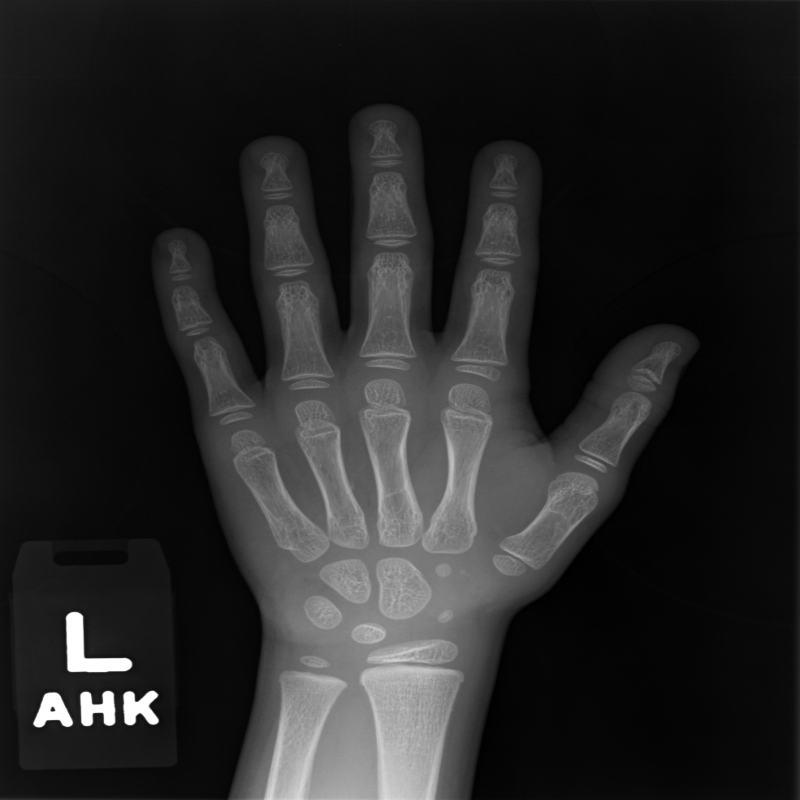

In [ ]:
# 입력
Image.open('/content/youtube-cnn-002-pytorch-unet/results/png/input_0000.png')

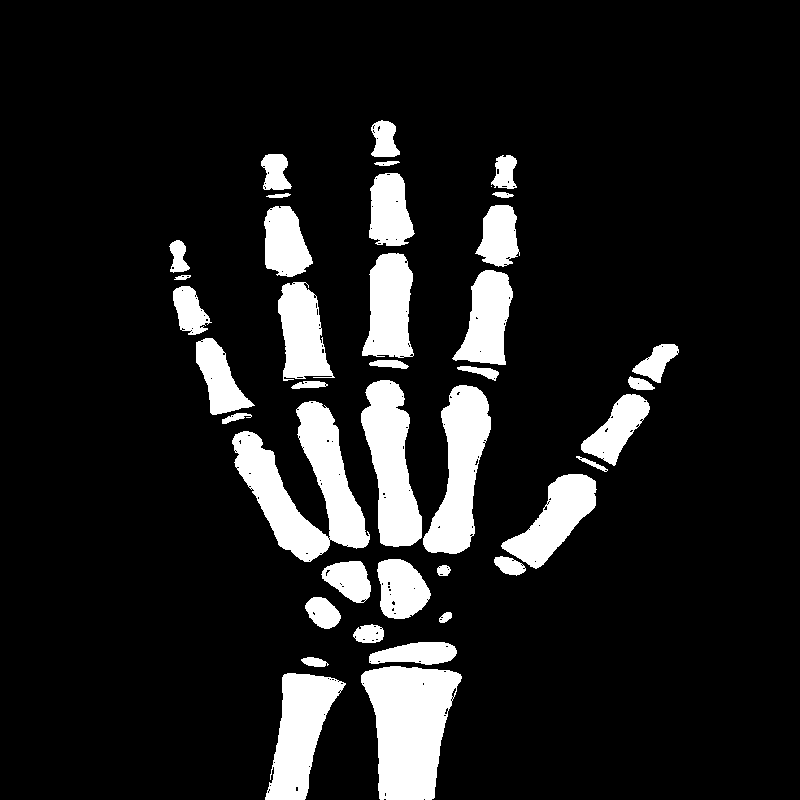

In [ ]:
# Ground Truth
Image.open('/content/youtube-cnn-002-pytorch-unet/results/png/label_0000.png')

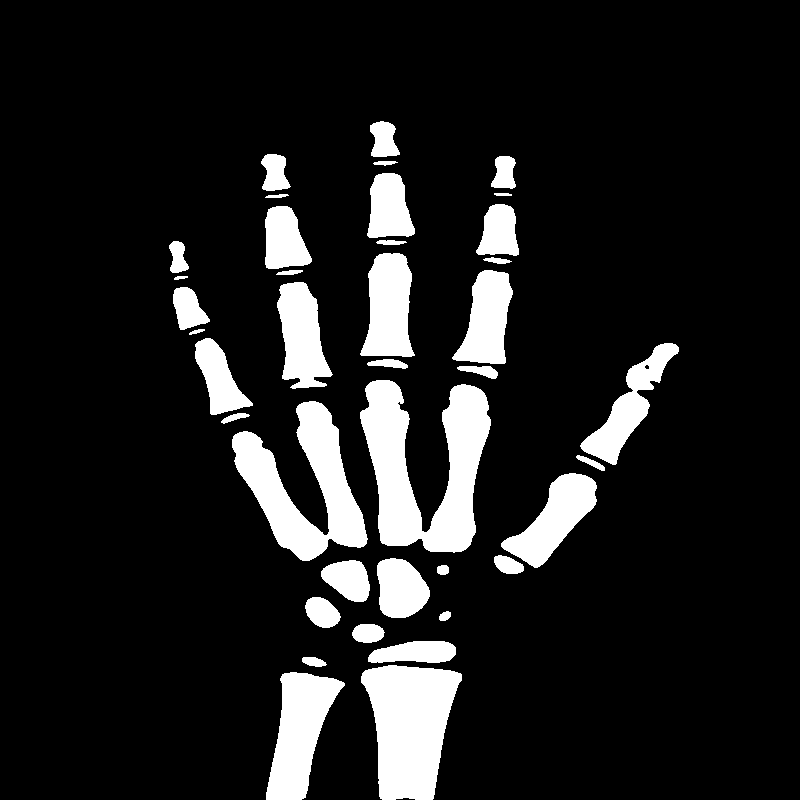

In [ ]:
# Result
Image.open('/content/youtube-cnn-002-pytorch-unet/results/png/output_0000.png')